# Vehicle Price Prediction using Machine Learning

## Objective
To build a regression model that predicts vehicle price based on technical and categorical specifications.

## Problem Type
Supervised Learning – Regression

## Target Variable
Price (Continuous numeric value)


## Business Understanding

Vehicle pricing depends on multiple factors such as:
- Engine volume
- Fuel type
- Manufacturer
- Gearbox type
- Drive wheels
- Interior features

The goal is to build a machine learning model that captures non-linear relationships and predicts price accurately.


In [1]:
# ============================================
# Import Required Libraries
# ============================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error

import joblib

## Step 1: Load Dataset

The dataset contains vehicle specifications and price information.

In [2]:
#implementinglinear regression with scikit learn
import pandas as pd

auto_data = pd.read_csv('auto.txt')
auto_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Data Preprocessing

Steps performed:
- Replaced '-' with NaN
- Converted numeric-like object columns to numeric
- Removed irrelevant features (ID, Model, Doors, Color, Wheel)
- Encoded categorical variables
- Removed missing values
- Outlier detection using IQR

## Step 2: Data Cleaning

- Replace '-' with NaN
- Convert numeric-like columns to numeric datatype
- Remove irrelevant columns

In [3]:
# As u can see there are some columns with '-' values. We need to clean them
# Replace '-' values with NaN
import numpy as np
auto_data = auto_data.replace('-',np.nan)
auto_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
auto_data.shape

(19237, 18)

In [5]:
# To find the datatype of the features like at front it may look like its a number but internally its a different datatype.
auto_data['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

#### Convert target column to numeric

In [6]:
# Here its float but in some cases it will be object where it leads model to fail.
# So we convert in such a way or feature datatype should be in float or int type only.

#to numeric will convert it to numbers but while converting 
#if errors happen then forcefully convert it to numbers using coerce.
auto_data['Price']  = pd.to_numeric(auto_data['Price'],errors='coerce')
auto_data['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [7]:
# More features are there ml might fail as result of giving unnessary or not influencying feature.
# More rows are good but not more columns

# Too many columns may cause:
# 1. Noise in data
# 2. Overfitting
# 3. Increased complexity
# 4. Slower training
# 5. Poor generalization on new data

In [8]:
# I removed ID because it’s an identifier, dropped Model and Color due to high cardinality and low correlation, and 
# removed Doors and Wheel because they add noise and don’t significantly impact price.

# curse of columns - more features high chance of model failing
auto_data.drop(['ID', 'Model', 'Doors', 'Color', 'Wheel'], axis=1, inplace=True)
auto_data.head()

# More data rows improve learning, but too many irrelevant columns can confuse the model and reduce accuracy.

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,12
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,8
2,8467,NaN,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,2
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,0
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4


In [9]:
auto_data.shape

(19237, 13)

#### Convert Columns to Proper Datatype

In [10]:
# Now lets check for the other features which appear as numbers from outside but internally acting as object
auto_data['Levy'].describe()

count     13418
unique      558
top         765
freq        486
Name: Levy, dtype: object

In [11]:
#As its a object we need to convert previously we simply converted price as example
auto_data['Levy']  = pd.to_numeric(auto_data['Levy'],errors='coerce')
auto_data['Levy'].describe()

count    13418.000000
mean       906.838128
std        461.867051
min         87.000000
25%        640.000000
50%        781.000000
75%       1058.000000
max      11714.000000
Name: Levy, dtype: float64

In [12]:
auto_data['Engine volume'].describe()

count     19237
unique      107
top           2
freq       3916
Name: Engine volume, dtype: object

In [13]:
auto_data['Engine volume']  = pd.to_numeric(auto_data['Engine volume'],errors='coerce')
auto_data['Engine volume'].describe()

count    17306.000000
mean         2.312990
std          0.888156
min          0.000000
25%          1.800000
50%          2.000000
75%          2.500000
max         20.000000
Name: Engine volume, dtype: float64

In [14]:
auto_data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Airbags'],
      dtype='str')

In [15]:
#Here check every feature datatype
auto_data['Airbags']

0        12
1         8
2         2
3         0
4         4
         ..
19232     5
19233     8
19234     4
19235     4
19236    12
Name: Airbags, Length: 19237, dtype: int64

In [16]:
# If in cylinders its one to nine string format then we convert using the dictionary mapping technique
# cylinders_dict={
#     'one' : 1,
#     'two' : 2,
#     'three' : 3,
#     'four' : 4,
#     'six' : 5,
#     'eight' : 8,
#     'twelve' : 12
# }
# auto_data['Cylinders'].replace(cylinders_dict, inplace=True)

auto_data['Cylinders'].head()

0    6.0
1    6.0
2    4.0
3    4.0
4    4.0
Name: Cylinders, dtype: float64

In [17]:
# To have it in int format
# auto_data['Cylinders'] = auto_data['Cylinders'].astype(int)
auto_data.tail()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
19232,8467,NaN,MERCEDES-BENZ,1999,Coupe,Yes,CNG,NaN,300000 km,4.0,Manual,Rear,5
19233,15681,831.0,HYUNDAI,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,8
19234,26108,836.0,HYUNDAI,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,4
19235,5331,1288.0,CHEVROLET,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,4
19236,470,753.0,HYUNDAI,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,12


#### Converting string data to numeric

In [18]:
# Remove ' km' text and convert Mileage to numeric
# Force Mileage column to string first
auto_data['Mileage'] = auto_data['Mileage'].astype(str)
# Remove ' km'
auto_data['Mileage'] = auto_data['Mileage'].str.replace(' km', '', regex=False)
# Convert to numeric
auto_data['Mileage'] = pd.to_numeric(auto_data['Mileage'], errors='coerce')
auto_data['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

In [19]:
auto_data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,12
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,8
2,8467,NaN,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,2
3,3607,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,0
4,11726,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4


#### converting with the help of dummies

In [20]:
# Curse of Dimensionality
# Too many columns
# Data becomes sparse (mostly 0 / False)
# Model struggles to learn patterns

# auto_data = pd.get_dummies(auto_data, columns=[
#     'Manufacturer', 'Category','Leather interior', 'Fuel type','Gear box type', 'Drive wheels'
# ])
#Doing this columns exploded from 18 to 99 not a good approach
auto_data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,12
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,8
2,8467,NaN,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,2
3,3607,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,0
4,11726,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4


In [21]:
auto_data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Airbags'],
      dtype='str')

## Encoding Categorical Variables

- Binary features mapped manually
- Multi-category features encoded using LabelEncoder


#### Used Label Encoding for converting string to int

In [22]:
# I used dictionary mapping for binary features like Leather interior and label encoding for multi-class categorical features to avoid dimensional explosion and overfitting.
# Dict mapping → Binary values
# Label encoding → Many categories
# One-hot encoding → Only when categories are very few

# Label Encoding assigns arbitrary but consistent numbers to each category.

# The numbers are not random every time
# They are fixed once fitted
# The order is usually alphabetical

#### Note: Although vehicle price prediction is a regression problem, I used a tree-based regression model. Tree-based regressors do not assume ordinal relationships, so label encoding does not introduce bias and is safe in this case.

In [23]:
from sklearn.preprocessing import LabelEncoder

# Binary mapping
auto_data['Leather interior'] = auto_data['Leather interior'].map({'Yes':1, 'No':0})

# Label encoding for multi-category features
le = LabelEncoder()
multi_cols = ['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels']

for col in multi_cols:
    auto_data[col] = le.fit_transform(auto_data[col])


In [24]:
auto_data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399.0,32,2010,4,1,2,3.5,186005,6.0,0,0,12
1,16621,1018.0,8,2011,4,0,5,3.0,192000,6.0,2,0,8
2,8467,NaN,21,2006,3,0,5,1.3,200000,4.0,3,1,2
3,3607,862.0,16,2011,4,1,2,2.5,168966,4.0,0,0,0
4,11726,446.0,21,2014,3,1,5,1.3,91901,4.0,0,1,4


#### Remove nan or missing values by droping it

In [25]:
auto_data.isna().sum()

Price                  0
Levy                5819
Manufacturer           0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume       1931
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Airbags                0
dtype: int64

In [26]:
#Lets clean up our data
# Drop rows with missing values
auto_data = auto_data.dropna()
auto_data

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399.0,32,2010,4,1,2,3.5,186005,6.0,0,0,12
1,16621,1018.0,8,2011,4,0,5,3.0,192000,6.0,2,0,8
3,3607,862.0,16,2011,4,1,2,2.5,168966,4.0,0,0,0
4,11726,446.0,21,2014,3,1,5,1.3,91901,4.0,0,1,4
5,39493,891.0,23,2016,4,1,1,2.0,160931,4.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055.0,36,2013,9,1,1,3.5,107800,6.0,0,2,12
19233,15681,831.0,23,2011,9,1,5,2.4,161600,4.0,2,1,8
19234,26108,836.0,23,2010,4,1,1,2.0,116365,4.0,0,1,4
19235,5331,1288.0,8,2007,4,1,1,2.0,51258,4.0,0,1,4


In [27]:
auto_data.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Airbags             0
dtype: int64

#### Trying fillna instead of dropna if less number of rows are ther but here more rows are there we shall drop it

In [28]:
# Dataset is large → dropping some rows won’t hurt learning
# Levy and engine volume are important features
# Incorrect imputation could introduce bias
# So dropping is safer for this project

In [29]:
# del auto_data['Mileage']

## Outlier Detection (IQR Method)

Outliers were removed only from the target variable (Price) because extreme price values can distort regression learning.

IQR Formula:
IQR = Q3 - Q1

Lower Bound = Q1 - 1.5 × IQR  
Upper Bound = Q3 + 1.5 × IQR


In [30]:
# Outlier detection performed only on target variable (Price)
# because extreme price values can distort regression learning.

Q1 = auto_data['Price'].quantile(0.25)
Q3 = auto_data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

auto_data = auto_data[(auto_data['Price'] >= lower_bound) & 
                      (auto_data['Price'] <= upper_bound)]


In [31]:
# !pip install seaborn

## Exploratory Data Analysis

- Checked price distribution
- Analyzed feature correlations
- Identified relationships between variables


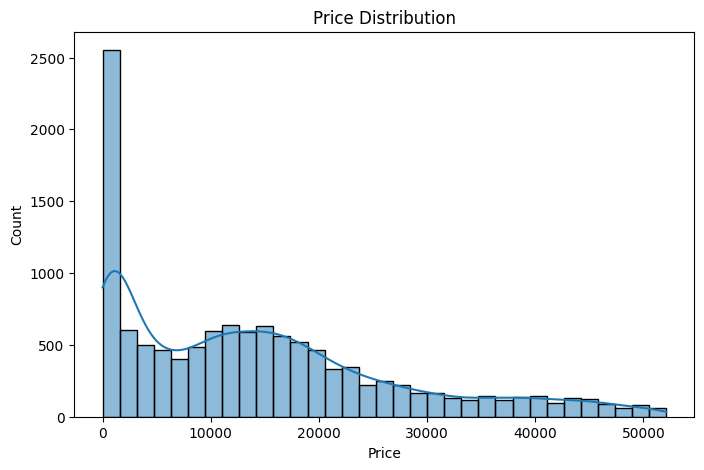

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(auto_data['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

##  Price Distribution Analysis

The price distribution appears right-skewed, meaning there are more lower-priced vehicles and fewer high-priced vehicles.

This indicates that the dataset contains some expensive outliers, which justifies the IQR-based outlier removal performed earlier.

Since the target variable is not normally distributed, linear models may struggle to fit extreme price values effectively.


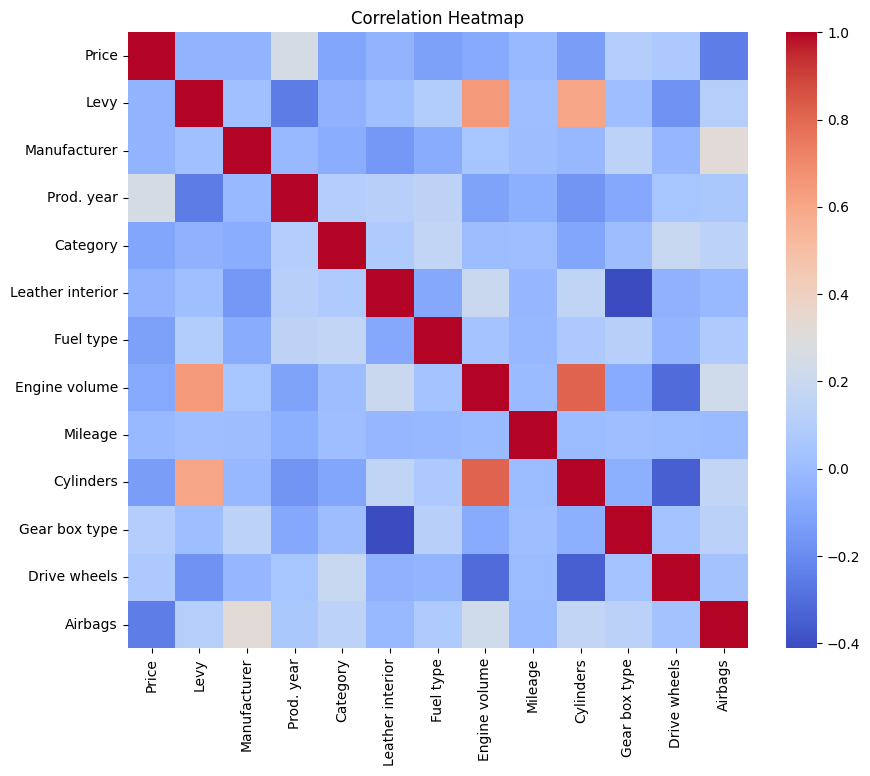

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(auto_data.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##  Correlation Analysis

From the correlation heatmap, no single feature shows extremely high correlation with price.

This suggests that vehicle pricing depends on multiple interacting features rather than one dominant factor.

It also supports the use of tree-based ensemble models, which can capture complex feature interactions better than simple linear models.


## Model Training & Evaluation

Models used:
- Linear Regression
- Lasso
- Ridge
- Gradient Boosting
- Random Forest

Evaluation Metrics:
- R² Score
- RMSE (Root Mean Squared Error)

## Step 3 - Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
# Define features and target
x = auto_data.drop('Price', axis=1)
y = auto_data['Price']

#30 percentage for testing the data
split_test_size = 0.2

#random state because to get everytime the same same shuffled data as randint picks random numbers between that range
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=split_test_size,random_state = 42)

#### lets Apply mean stratergy to whereever 0 or nan is present. For nan if we apply we are trying to fillna with the help of imputer

In [35]:
# Never replace 0 in encoded categorical columns
# missing_values=np.nan
# Check which numeric columns have 0
(auto_data[['Price','Levy','Engine volume']] == 0).sum()

Price            0
Levy             0
Engine volume    9
dtype: int64

#### Zero values are not removed globally. I only treat zero as missing when it is logically invalid, such as for price, mileage, levy, or engine volume.For encoded categorical features, zero is a valid category and should not be altered.

In [36]:
# ============================================
# Handle Missing Values AFTER Train-Test Split
# ============================================

from sklearn.impute import SimpleImputer
cols_with_invalid_zero = ['Engine volume']
imputer = SimpleImputer(missing_values=0, strategy='mean')
# Fit ONLY on training data
x_train[cols_with_invalid_zero] = imputer.fit_transform(x_train[cols_with_invalid_zero])
# Apply SAME transformation on test data
x_test[cols_with_invalid_zero] = imputer.transform(x_test[cols_with_invalid_zero])


In [37]:
auto_data[:]

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399.0,32,2010,4,1,2,3.5,186005,6.0,0,0,12
1,16621,1018.0,8,2011,4,0,5,3.0,192000,6.0,2,0,8
3,3607,862.0,16,2011,4,1,2,2.5,168966,4.0,0,0,0
4,11726,446.0,21,2014,3,1,5,1.3,91901,4.0,0,1,4
5,39493,891.0,23,2016,4,1,1,2.0,160931,4.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055.0,36,2013,9,1,1,3.5,107800,6.0,0,2,12
19233,15681,831.0,23,2011,9,1,5,2.4,161600,4.0,2,1,8
19234,26108,836.0,23,2010,4,1,1,2.0,116365,4.0,0,1,4
19235,5331,1288.0,8,2007,4,1,1,2.0,51258,4.0,0,1,4


## Step 4 : Train The algorithm

In [38]:
# Train Linear Regression
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
# accuracy
linear_model.score(x_train,y_train)

0.21063251473759204

In [40]:
#coefficients to decide which columns are more important to decide and which are not
#coef values close to 0 are not important better to remove those columns
linear_model.coef_

array([ 3.12821794e+00, -6.12407583e-01,  1.43505343e+03, -3.87121449e+02,
       -2.20979302e+02, -1.21607918e+03,  1.49160104e+03,  1.77092585e-06,
       -1.62530539e+03,  3.43341883e+03,  1.77665117e+03, -8.08930491e+02])

In [41]:
# To be more precise with coef
predictors = x_train.columns ## see the weights associated with particular feature
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)
# Here millage is 0 we can remove it before train test split

Cylinders          -1625.305385
Fuel type          -1216.079178
Airbags             -808.930491
Category            -387.121449
Leather interior    -220.979302
Manufacturer          -0.612408
Mileage                0.000002
Levy                   3.128218
Prod. year          1435.053428
Engine volume       1491.601045
Drive wheels        1776.651173
Gear box type       3433.418834
dtype: float64


## Step 5 : Test The Algorithm

#### linear reggresion model

In [42]:
#Lets predict using linear reggresion model
linear_pred = linear_model.predict(x_test)

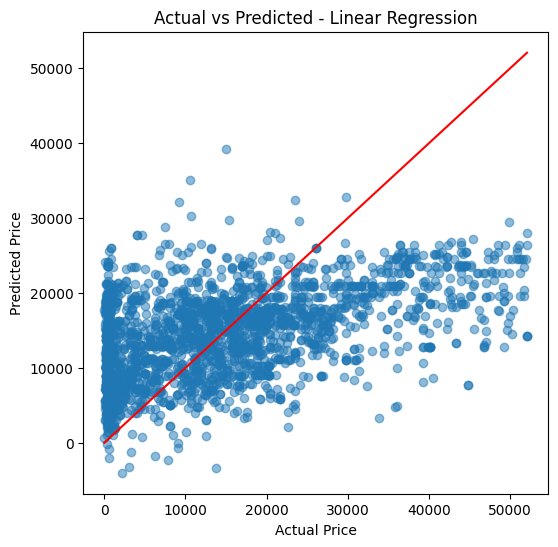

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, linear_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

## Step 6 : Find the error and r2 score

In [44]:
# Evaluate
linear_r2 = r2_score(y_test, linear_pred)
# Find the error. How much is the error in the output
# Mean Squared Error - this will tell us how much error is there on the given output

linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred)) 
# predicted y and actual y
#important i.e 14873(actual price is 500+-14873 = prected value)
#so error must be less

print("Linear Regression R2:", linear_r2)
print("Linear Regression RMSE:", linear_rmse)

Linear Regression R2: 0.22939356217987716
Linear Regression RMSE: 11304.402324162034


In [45]:
# how well our regression model works on our test data -- this is our accuaracy i.e r^2 score
# Interally works same as above but this is preffered in classification problems more to define accuracy
# score = linear_model.score(x_test,y_test)
# score

## 📊 Interpretation – Linear Regression

The predicted values do not closely follow the actual vehicle prices.  
Predictions are compressed within a limited range and fail to capture high-price variations.

R² score (~0.22) indicates that Linear Regression explains only 22% of the variance in vehicle prices.

### Conclusion
Linear Regression underfits the dataset because vehicle pricing contains strong non-linear patterns that a simple linear model cannot capture effectively.


## Step 7 :  Improvise , lets test with other algorithmns

#### Lasso

In [46]:
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
# import math

# Step 1: Scale the data (VERY IMPORTANT for Lasso)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 2: Create Lasso model (NO normalise parameter)
lasso_model = Lasso(alpha=4.5)

# Step 3: Train the model
lasso_model.fit(x_train_scaled, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",4.5
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [47]:
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

Airbags            -3623.494015
Fuel type          -2127.896840
Cylinders          -1744.353040
Category           -1053.097652
Leather interior     -69.679180
Manufacturer          -3.639330
Mileage               13.242114
Drive wheels         849.854616
Engine volume       1275.814029
Levy                1453.935885
Gear box type       2351.896425
Prod. year          4214.313941
dtype: float64


In [48]:
# Predict using Lasso
lasso_pred = lasso_model.predict(x_test_scaled)

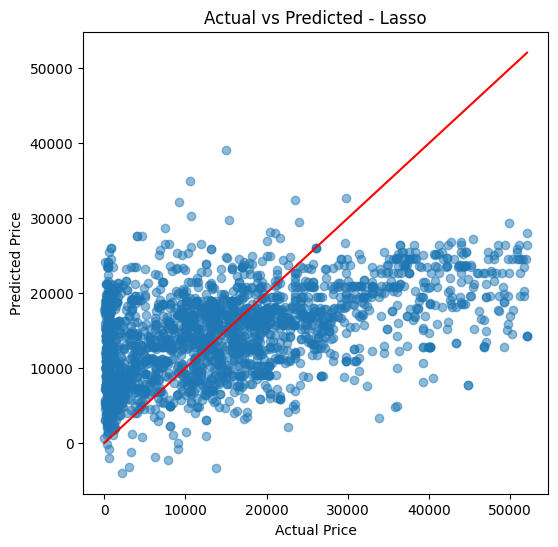

In [49]:
#Lets plot the prediction using matplot lib
#Comparing the actual prices with the predicted prices

plt.figure(figsize=(6,6))
plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Lasso")
plt.show()

In [50]:
# how well our regression model works on our test data -- this is our accuaracy
# Evaluate
score = lasso_model.score(x_test_scaled, y_test)
print("Lasso R2 Score:", score)

Lasso R2 Score: 0.22928383341285008


In [51]:
from sklearn.metrics import mean_squared_error
lasso_mse = mean_squared_error(y_test, lasso_pred) # predicted y and actual y
lasso_mse #its coming out to be 26 millions

127807708.20607361

In [52]:
import math
lasso_rmse = math.sqrt(lasso_mse)
print("Lasso RMSE:", lasso_rmse) #important i.e 14873(actual price is 500+-14873 = prected value)
#so error must be less

Lasso RMSE: 11305.207127959824


## 📊 Interpretation – Lasso Regression

Lasso did not improve performance over Linear Regression.  
Predictions remain compressed and higher-priced vehicles are underpredicted.

The R² score remains low (~0.22), indicating underfitting.

## Step 8: Ridge Algorithm

In [53]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=5.0)
ridge_model.fit(x_train, y_train)
ridge_pred=ridge_model.predict(x_test)

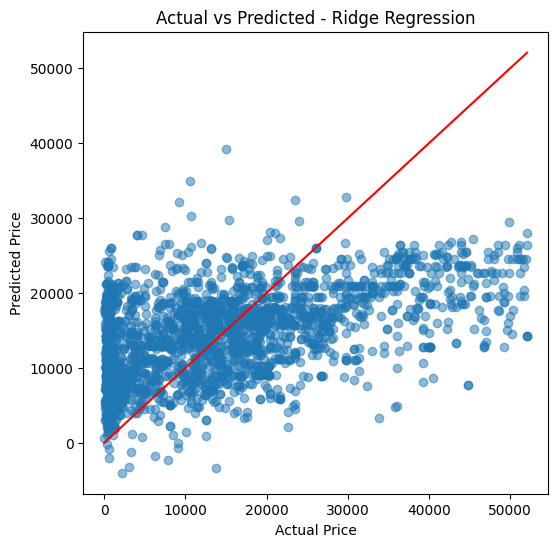

In [54]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, ridge_pred, alpha=0.5)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Ridge Regression")

plt.show()

In [55]:
score = ridge_model.score(x_test, y_test)
print('R2 score of ridge model is...', score)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Ridge RMSE:", ridge_rmse)

R2 score of ridge model is... 0.229381950636934
Ridge RMSE: 11304.487491539396


## 📊 Interpretation – Ridge Regression

Ridge slightly improved stability compared to Linear Regression,  
but overall performance remains limited.

Since it still assumes linear relationships, the model continues to underfit the dataset.

## Step 9: GRADIENT BOOSTING REGRESSION

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(x_train, y_train)

# 4. Prediction
gb_train_pred = gb_model.predict(x_train)
gb_test_pred = gb_model.predict(x_test)

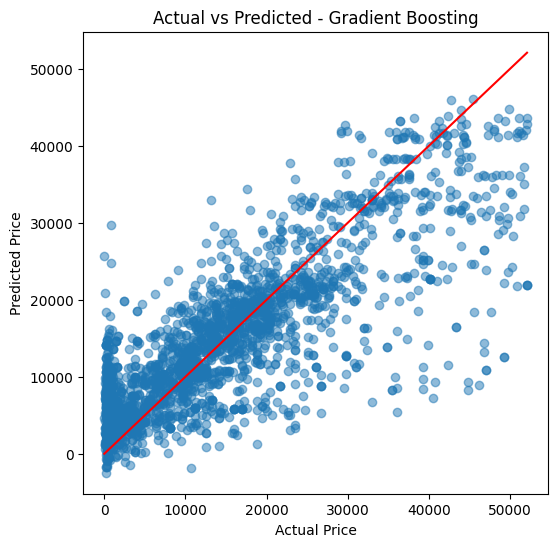

In [57]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, gb_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Gradient Boosting")
plt.show()


In [58]:
# 5. Evaluation for Gradient Boosting

gf_train_r2 = r2_score(y_train, gb_train_pred)
gf_test_r2 = r2_score(y_test, gb_test_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))

print("Gradient Boosting Train R² :", gf_train_r2)
print("Gradient Boosting Test R²  :", gf_test_r2)
print("Gradient Boosting RMSE     :", gb_rmse)

Gradient Boosting Train R² : 0.7226731258347068
Gradient Boosting Test R²  : 0.675101650760451
Gradient Boosting RMSE     : 7340.151801016234


## 📊 Interpretation – Gradient Boosting

Gradient Boosting performs significantly better than linear models.

Most predictions lie closer to the diagonal line, indicating reduced error.  
Test R² (~0.67) shows that the model explains about 67% of the variance.

There is a small gap between train and test R², suggesting mild overfitting, but overall generalization is acceptable.


## Step 10 : Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train, y_train)
#Prediction
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

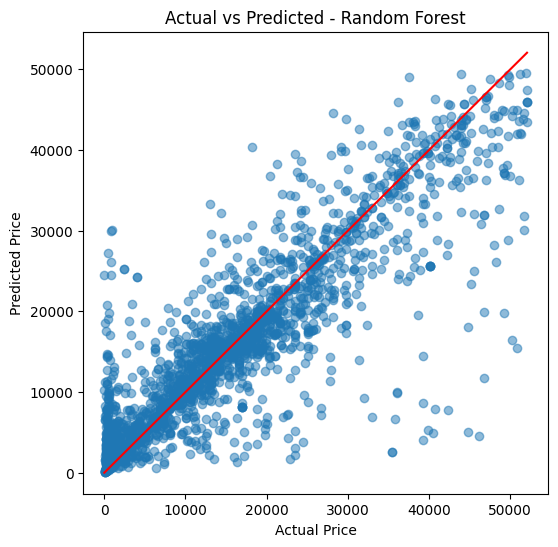

In [60]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Random Forest")
plt.show()


In [61]:
#Testing
rf_train_r2 = r2_score(y_train, y_train_pred)
rf_test_r2 = r2_score(y_test, y_test_pred)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train R² Score :", rf_train_r2)
print("Test R² Score  :", rf_test_r2)
print("RMSE           :", rf_rmse)

Train R² Score : 0.9640515116889149
Test R² Score  : 0.7909941961862036
RMSE           : 5887.222669963325


In [62]:
if rf_train_r2 - rf_test_r2 > 0.1:
    print("Model may be overfitting.")
else:
    print("Model generalizes well.")

Model may be overfitting.


## 📊 Interpretation – Random Forest

- Train R²: ≈ 0.96  
- Test R²: ≈ 0.79  
- RMSE: ≈ 5,887  

### Observations

- Predictions align much closer to actual values compared to previous models.
- High test R² indicates strong variance explanation (~79%).
- Lower RMSE confirms improved predictive accuracy.
- However, the gap between train and test R² suggests moderate overfitting.

### Conclusion

Random Forest significantly improves performance compared to linear models.  
It captures complex patterns in vehicle pricing, with acceptable generalization.

## Cross Validation

To ensure stable performance across different splits, 5-fold cross validation was performed.


In [63]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='r2')

print("Cross Validation R2 Scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())
print("CV Std Dev:", cv_scores.std())

Cross Validation R2 Scores: [0.79436429 0.81595668 0.80680623 0.78513608 0.8087988 ]
Mean CV R2: 0.8022124169499841
CV Std Dev: 0.01101437933150555


## Feature Importance Analysis

Feature importance helps interpret which vehicle attributes most influence price prediction.


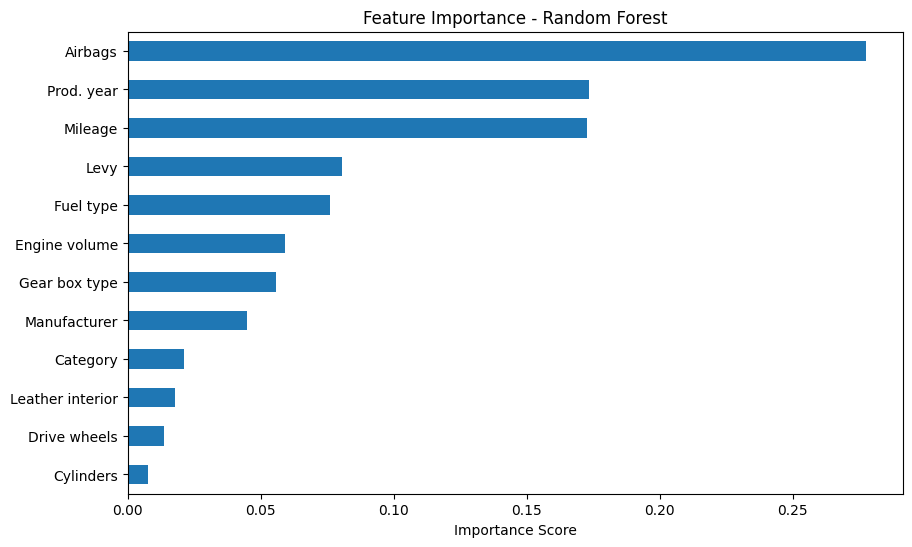

In [64]:
# Feature Importance - Random Forest
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(rf_model.feature_importances_, index=x_train.columns)
importances = importances.sort_values()

plt.figure(figsize=(10,6))
importances.plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()


From the feature importance plot, engine volume and manufacturer seem to have strong impact on vehicle price.

In [65]:
# Model Comparison

linear_r2 = linear_model.score(x_test, y_test)
lasso_r2 = lasso_model.score(x_test_scaled, y_test)
ridge_r2 = ridge_model.score(x_test, y_test)
gb_r2 = r2_score(y_test, gb_test_pred)
rf_r2 = r2_score(y_test, y_test_pred)

results = pd.DataFrame({
    "Model": ["Linear", "Lasso", "Ridge", "Gradient Boosting", "Random Forest"],
    "R2 Score": [linear_r2, lasso_r2, ridge_r2, gb_r2, rf_r2],
    "RMSE": [linear_rmse, lasso_rmse, ridge_rmse, gb_rmse, rf_rmse]
})


results.sort_values(by="R2 Score", ascending=False)


,Model,R2 Score,RMSE
4,Random Forest,0.790994,5887.222670
3,Gradient Boosting,0.675102,7340.151801
0,Linear,0.229394,11304.402324
2,Ridge,0.229382,11304.487492
1,Lasso,0.229284,11305.207128


Linear, Lasso and Ridge all assume linear relationships. Since vehicle pricing is non-linear, their performance remained similar and relatively low.

## Final Model Selection

Based on R² score, RMSE, and cross-validation results, Random Forest performed best among all models tested.

Therefore, RandomForestRegressor was selected as the final model for this dataset.

In [66]:
# Saving the Model

import joblib
joblib.dump(rf_model, "vehicle_price_model.pkl")

['vehicle_price_model.pkl']

## Limitations

- External factors like market demand, accident history, and brand reputation are not included.
- Hyperparameter tuning was not extensively performed.
- Slight overfitting observed in Random Forest.

Future improvements could include hyperparameter tuning and advanced feature engineering.


## Final Conclusion

Among all regression models evaluated, Random Forest provided the best balance between accuracy and generalization.

Overall, this project helped me understand how different regression algorithms behave on real-world noisy datasets. 
I observed how linear models underfit complex data, while ensemble models like Random Forest and Gradient Boosting handle non-linearity much better.
This project strengthened my understanding of model evaluation and generalization.